In [49]:
import pandas as pd
import numpy as np
import pickle 
from copy import deepcopy

In [207]:
import spacy 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [472]:
with open('saved_observations/test_obs_df_shell.pkl','rb') as input_file:
    test_shell = pickle.load(input_file)
test_shell.shape

(851, 3)

In [580]:
w2v = Word2Vec.load('w2vec_models/w2vec_model_shell.bin')

In [581]:
vocab = list(w2v.wv.vocab)
len(vocab)

9651

In [494]:
# w2v.wv['file_descriptors']

In [495]:
test_shell = test_shell.reset_index()

In [496]:
# test_shell

In [497]:
df = deepcopy(test_shell)

In [517]:
# consistent_1 = df[(df['label'] == 1) & (df['pred_label'] == 1)]
consistent_0 = df[(df['label'] == 0) & (df['pred_label'] == 0)]
consistent_0 = consistent_0.reset_index(drop=True)
# consistent_0 = consistent_0.reset_index(drop=True)
print(consistent_0.shape)
inconsistent_0 = df[(df['label'] == 1) & (df['pred_label'] == 0)]
# inconsistent_1 = df[df['label'] == 1 and df['pred_label'] == 0]
inconsistent_0 = inconsistent_0.reset_index(drop=True)
# inconsistent_1 = inconsistent_1.reset_index(drop=True)
print(inconsistent_0.shape)

(392, 5)
(28, 5)


In [542]:
con = consistent_0[consistent_0['task'].map(len) < 100].reset_index(drop=True)
# con = consistent_0
con.shape

(390, 5)

In [543]:
def shell_in(row):
    return 'shell' in row
con['shell_in'] = con['task'].apply(lambda x: shell_in(x))

In [544]:
con = con[con['shell_in'] == True].reset_index(drop=True)

In [545]:
con.shape

(3, 6)

In [546]:
con

,level_0,index,task,label,pred_label,shell_in
0,20,20552,"[AnsibleTask, TaskName, Get, file_descriptors,...",0,0,True
1,202,16917,"[AnsibleTask, TaskName, execute, ansible-playb...",0,0,True
2,526,15985,"[AnsibleTask, TaskName, Get, docker, device, T...",0,0,True


In [571]:
#shell,command 113 old, 1-1
#shell 
consistent_obser = con['task'][0]
# consistent_obser.remove(':')
consistent_obser

['AnsibleTask',
 'TaskName',
 'Get',
 'file_descriptors',
 'total_limit',
 'TaskDescription',
 'shell',
 'openshift_cli',
 'get',
 'project',
 'project_dev',
 'register',
 'result',
 'ignore_errors',
 'True',
 'changed_when',
 'False']

In [548]:
# 'shell' in inconsistent['tasks'][0]
def shell_in(row):
    return 'shell' in row
inconsistent_0['shell_in'] = inconsistent_0['task'].apply(lambda x: shell_in(x))

In [549]:
inc = inconsistent_0[inconsistent_0['shell_in'] == True].reset_index(drop=True)

In [550]:
incon = inc[inc['task'].map(len) < 25].reset_index(drop=True)

In [551]:
incon.shape

(19, 6)

In [552]:
#shell 3
incon_obs = incon['task'][3]
incon_obs

['AnsibleTask',
 'TaskName',
 'Save',
 'the',
 'iptables',
 'rules',
 'TaskDescription',
 'shell',
 'iptables-save',
 '/etc/sysconfig/iptables',
 'become',
 'True',
 'changed_when',
 'True']

In [576]:
incon_dict = {}
for tok in incon_obs:
    if (tok == 'AnsibleTask') or (tok == 'TaskDescription') or (tok == 'TaskName'):
        continue
    else:
        try:
            incon_dict[tok] = w2v.wv[tok]
        except:
            incon_dict[tok] = np.zeros((100, ))
        
    
const_dict = {}
for tok in consistent_obser:
    if (tok == 'AnsibleTask') or (tok == 'TaskDescription') or (tok == 'TaskName'):
        continue
    else:
        try:
            const_dict[tok] = w2v.wv[tok]
        except:
            const_dict[tok] = np.zeros((100, ))
            
a = np.zeros((100, ))
gget = np.zeros((100, ))
for t in const_dict:
    if not t == 'Get':
        continue
    else:
        gget = const_dict[t]
        a = np.random.lognormal(sigma=0.1, size=const_dict[t].shape)
    
avg = gget * a
    
for n in const_dict:
    if not const_dict[n].any():
        const_dict[n] = avg
        
            
def removekey(d, key):
    r = deepcopy(d)
    del r[key]
    return r

# for k in const_dict:
#     if not const_dict[k].any():
#         const_dict = removekey(const_dict,k)
        
for k in incon_dict:
    if not incon_dict[k].any():
        incon_dict = removekey(incon_dict,k)

In [577]:
const_dict['file_descriptors']

array([-6.2719118 ,  4.12483557,  4.97982694, -0.78085234, -2.67176686,
        3.43078797,  8.26924917, -3.27955359,  5.92930372, -1.79735344,
        0.31205308,  7.87438445,  0.33597022,  4.5923145 , -0.43293634,
        3.44909026, -3.92067733, -3.30014209,  1.31361475, -1.760067  ,
        0.37034046, -1.27177927, -3.09260682, -1.26741328,  0.75829816,
       -6.77016511,  5.60552402, -7.57813542, -6.34578953, -0.8359609 ,
       -3.93523667, -1.12442797,  7.74726769,  1.36069096, -4.7197146 ,
       -4.15470754,  6.26224296,  3.43537088, -6.3553246 , -1.81838254,
        8.3358118 , -3.74643985, -3.1207587 , -1.30798495, -3.47255316,
        2.68017853, -7.47448436,  0.57795004,  1.0434653 ,  0.40243362,
       -2.46116454, -9.02809324,  0.05656382, -6.80700366,  3.52675761,
       -6.67099685,  2.9472855 ,  2.28618208,  1.27328678,  0.79982254,
       -0.39205557,  1.46454098,  4.20979665,  2.26864008,  3.96817252,
        4.99489874,  2.84990091,  6.37660438, -0.21477702, -0.34

In [512]:
# list(w2v.wv.vocab)

In [578]:
def tsne_plot(task_dict,obs):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in task_dict.keys():
        tokens.append(task_dict[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1000)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        if (obs == 'consistent'):
            plt.savefig('tsne/tsne_consistent_00_shell.png')
        else:
            plt.savefig('tsne/tsne_inconsistent_01_shell.png')
    plt.show()

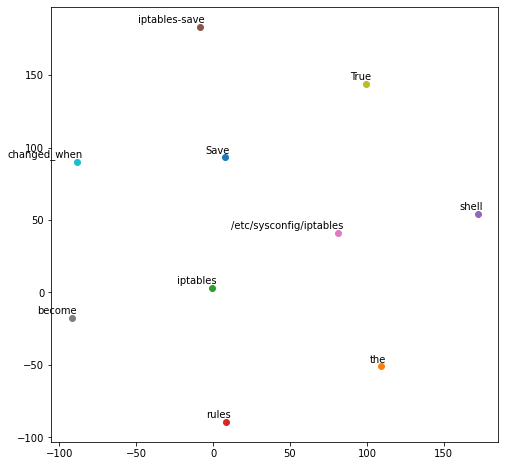

In [569]:
tsne_plot(incon_dict,'inconsistent')

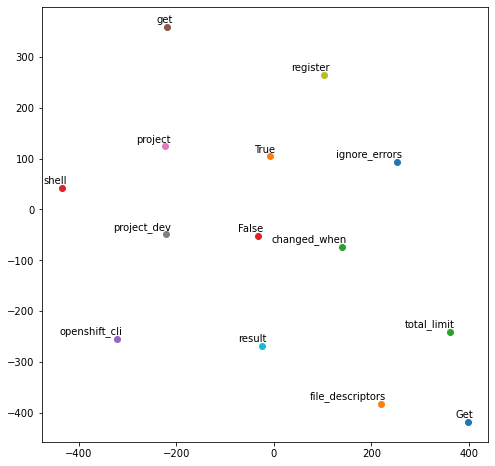

In [579]:
tsne_plot(const_dict,'consistent')

In [96]:
# most_similar = w2v.wv.most_similar(positive=['shell'], topn = 9650)
# most_similar

In [97]:
# most_similar

In [322]:
dict_1= dict(most_similar)

In [318]:
cs = set(const_dict) & set(ms)
cs

{'-rf', '/tmp/', 'Remove', 'any', 'files', 'guid', 'lingering', 'rm', 'tmp'}

In [323]:
for key in cs:
    print(dict_1[key])

-0.12922970950603485
0.11908363550901413
-0.23340706527233124
-0.10124753415584564
-0.22650593519210815
-0.13229884207248688
-0.08270986378192902
0.01736731268465519
-0.038337063044309616


<h3>External datatset</h3>

In [313]:
df_valid = pd.read_excel('sample380_inconst.xlsx')

In [314]:
with open('test_task_complete.pkl','rb') as input_file:
    test_task_complete = pickle.load(input_file)
test_task_complete

12022    [AnsibleTask, TaskName, docker, check, existin...
10322    [AnsibleTask, TaskName, Register, Provider, Fi...
9748     [AnsibleTask, TaskName, Establishing, Variable...
3040     [AnsibleTask, TaskName, Check, if, the, device...
9249     [AnsibleTask, TaskName, lan, TaskDescription, ...
                               ...                        
4122     [AnsibleTask, TaskName, fail, if, dedicated_de...
3484     [AnsibleTask, TaskName, fail, if, osd, and, md...
4913     [AnsibleTask, TaskName, Fail, if, not, a, new,...
3671     [AnsibleTask, TaskName, check, if, lvm_osds, i...
3693     [AnsibleTask, TaskName, verify, osd_objectstor...
Name: task_complete, Length: 380, dtype: object

In [315]:
# df_valid = df_valid.drop(columns=['Unnamed: 0'])
df_valid.shape

(380, 10)

In [316]:
def Convert(string):
    li = list(string.split(" "))
    return li

In [317]:
df_valid['task_name_toks'] = df_valid['task_name'].apply(lambda x: Convert(x))

In [318]:
df_valid['task_name_toks']

0               [docker, |, check, existing, secret_key]
1                      [Register, Provider, First, Time]
2                               [Establishing, Variable]
3      [Check, if, the, device, is, a, partition, or,...
4                                                  [lan]
                             ...                        
375    [fail, if, dedicated_device, is, not, the, siz...
376    [fail, if, osd, and, mds, range, is, filtered,...
377       [Fail, if, not, a, new, release, of, Red, Hat]
378    [check, if, lvm_osds, is, supported, by, the, ...
379    [verify, osd_objectstore, is, 'filestore', whe...
Name: task_name_toks, Length: 380, dtype: object

In [321]:
df_valid['task_complete'] = test_task_complete.values

In [322]:
df_valid.head()

,Unnamed: 0,task_name,method_description,mod_keys_found_string,pred_label,reviewer_1,reviewer_2,review_agreement,actual_label,is_prediction_correct,task_name_toks,task_complete
0,12022,docker | check existing secret_key,"{'shell': ""cat /etc/docket/prod.yaml | awk '/^...",shell,0,0,0,yes,0,1,"[docker, |, check, existing, secret_key]","[AnsibleTask, TaskName, docker, check, existin..."
1,10322,Register Provider First Time,{'shell': 'cat /var/plexguide/server.provider'...,shell,0,0,0,yes,0,1,"[Register, Provider, First, Time]","[AnsibleTask, TaskName, Register, Provider, Fi..."
2,9748,Establishing Variable,"{'shell': 'echo {{program_var.stdout}}', 'regi...",shell,0,0,0,yes,0,1,"[Establishing, Variable]","[AnsibleTask, TaskName, Establishing, Variable..."
3,3040,Check if the device is a partition or a disk,"{'shell': ""echo '{{ item }}' | egrep '/dev/(([...",shell,0,1,1,yes,1,0,"[Check, if, the, device, is, a, partition, or,...","[AnsibleTask, TaskName, Check, if, the, device..."
4,9249,lan,"{'shell': ""hostname -I | awk '{print $1}' | se...",shell,0,0,0,yes,0,1,[lan],"[AnsibleTask, TaskName, lan, TaskDescription, ..."


In [425]:
df_valid2 = deepcopy(df_valid)

In [426]:
consistent_0_val = df_valid2[(df_valid2['actual_label'] == 0) & (df_valid2['pred_label'] == 0)]
# consistent_0 = df[df['label'] == 0 and df['pred_label'] == 0]
consistent_0_val = consistent_0_val.reset_index(drop=True)
# consistent_0 = consistent_0.reset_index(drop=True)
print(consistent_0_val.shape)
inconsistent_0_val = df_valid2[(df_valid2['actual_label'] == 1) & (df_valid2['pred_label'] == 0)]
# inconsistent_1 = df[df['label'] == 1 and df['pred_label'] == 0]
inconsistent_0_val = inconsistent_0_val.reset_index(drop=True)
# inconsistent_1 = inconsistent_1.reset_index(drop=True)
print(inconsistent_0_val.shape)

(193, 12)
(187, 12)


In [427]:
con_val = consistent_0_val[consistent_0_val['task_complete'].map(len) < 25].reset_index(drop=True)
# con = consistent_0
con_val.shape

(121, 12)

In [428]:
def shell_in(row):
    return 'shell' in row
con_val['shell_in'] = con_val['task_complete'].apply(lambda x: shell_in(x))

In [429]:
con_val = con_val[con_val['shell_in'] == True].reset_index(drop=True)

In [430]:
con_val.shape

(17, 13)

In [435]:
consistent_obser_val = con_val['task_complete'][5]
# consistent_obser.remove(':')
consistent_obser_val

['AnsibleTask',
 'TaskName',
 'Java',
 'Source',
 'environment',
 'variables',
 'TaskDescription',
 'shell',
 'source',
 '/etc/profile',
 'args',
 'executable',
 '/bin/bash',
 'changed_when',
 'False',
 'tags',
 'skip_ansible_lint']

In [437]:
incon_val = inconsistent_0_val[inconsistent_0_val['task_complete'].map(len) < 25].reset_index(drop=True)
# con = consistent_0
incon_val.shape

(128, 13)

In [436]:
# 'shell' in inconsistent['tasks'][0]
def shell_in(row):
    return 'shell' in row
inconsistent_0_val['shell_in'] = inconsistent_0_val['task_complete'].apply(lambda x: shell_in(x))

In [438]:
incon_val = incon_val[incon_val['shell_in'] == True].reset_index(drop=True)

In [439]:
incon_val.shape

(12, 13)

In [447]:
inconsistent_obser_val = incon_val['task_complete'][6]
# consistent_obser.remove(':')
inconsistent_obser_val

['AnsibleTask',
 'TaskName',
 'reload',
 'systemd',
 'TaskDescription',
 'shell',
 'systemctl',
 'daemon-reload',
 'changed_when',
 'False',
 'when',
 'mongodb_is_systemd']

In [448]:
incon_dict_val = {}
for tok in inconsistent_obser_val:
    if (tok == 'AnsibleTask') or (tok == 'TaskDescription') or (tok == 'TaskName'):
        continue
    else:
        try:
            incon_dict_val[tok] = w2v.wv[tok]
        except:
            incon_dict_val[tok] = np.zeros((100, ))
        
    
const_dict_val = {}
for tok in consistent_obser_val:
    if (tok == 'AnsibleTask') or (tok == 'TaskDescription') or (tok == 'TaskName'):
        continue
    else:
        try:
            const_dict_val[tok] = w2v.wv[tok]
        except:
            const_dict_val[tok] = np.zeros((100, ))
            
def removekey(d, key):
    r = deepcopy(d)
    del r[key]
    return r

for k in const_dict_val:
    if not const_dict_val[k].any():
        const_dict_val = removekey(const_dict_val,k)
        
for k in incon_dict_val:
    if not incon_dict_val[k].any():
        incon_dict_val = removekey(incon_dict_val,k)

In [449]:
# const_dict_val

In [450]:
# incon_dict_val

In [451]:
def tsne_plot(task_dict,obs):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in task_dict.keys():
        tokens.append(task_dict[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1000)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        if (obs == 'consistent'):
            plt.savefig('tsne/tsne_consistent_00_shell_validation.png')
        else:
            plt.savefig('tsne/tsne_inconsistent_01_shell_validation.png')
    plt.show()

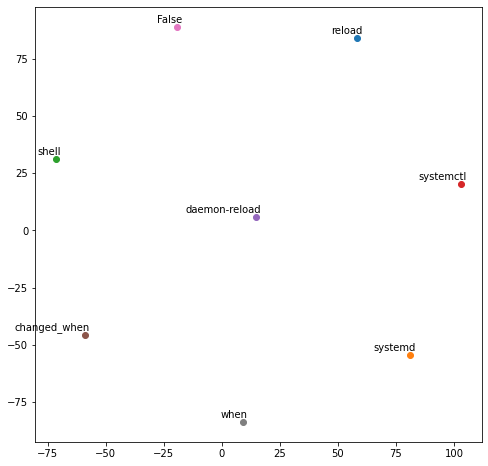

In [453]:
tsne_plot(incon_dict_val,'inconsistent')

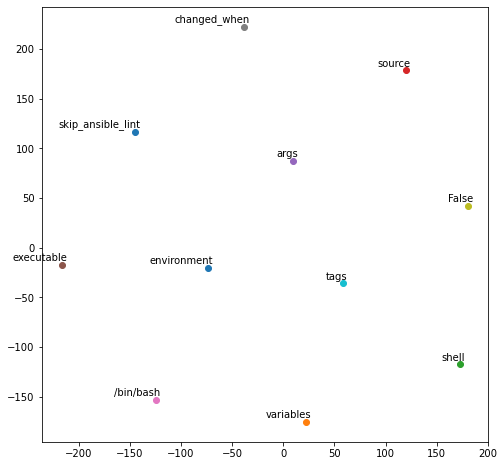

In [446]:
tsne_plot(const_dict_val,'consistent')

In [596]:
len(vocab)

9651

In [584]:
with open('val_set.pkl', 'rb') as input_file:
    val_set = pickle.load(input_file)   
val_set.columns

Index(['repo_count', 'task_name', 'method_description', 'mod_keys_found',
       'mod_values_found', 'key_module_text', 'value_module_text', 'third_ast',
       'token_task_names', 'third_tokens', 'descr_one_string',
       'token_names_one_string', 'task_com', 'task_complete'],
      dtype='object')

In [587]:
def to_list(row):
    
    ll = list(row.split(" "))
    
    return ll
    
val_set['task_name2'] = val_set['task_name'].apply(lambda x: to_list(x))

In [589]:
t_list = [task for task in val_set['task_name2']]

In [590]:
unique_words_val = []
for t in t_list:
    for token in t:
        if token not in unique_words_val:
            unique_words_val.append(token)
        else:
            continue

In [592]:
len(unique_words_val)

4791

In [594]:
len(list(set(unique_words_val) & set(vocab)))

1316

In [595]:
1316/4791

0.2746816948445001